# Social Network Analysis - Descriptive Analysis
This notebook contains standard descriptive analysis about the social network data provided to us.

# Approach
1. Import and First Look
2. Descriptive Analysis
    1. Time Series
    2. Duplicates
    3. User

# 1. Import and First Look

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Directory and data frame
filepath_dataset = r"C:\Users\Dimka\OneDrive\Desktop\Unsupervised Learning Project\Case Study Material\dataset.json"
filepath_graph = r"C:\Users\Dimka\OneDrive\Desktop\Unsupervised Learning Project\Case Study Material\graph.csv"
df_dataset = pd.read_json(
    filepath_dataset
)  # Social Media Messages data frame
df_graph = pd.read_csv(
    filepath_graph,
    delimiter=",",
)  # Social Media Network data frame

In [3]:
# First look at the Social Media Messages Data Frame
df_dataset.head(10)
display(
    df_dataset.head(
        10
    )
)
print(
    df_dataset.shape
)

# Summary statistics for the Social Media Messages Data Frame
summary_statistics = df_dataset.describe(
    include="all"
)
display(
    summary_statistics
)

,timestamp,text,text_id,user,user_id
0,2024-10-31,Running a business means juggling countless ad...,2018569761,danielwoodard,1077866112
1,2024-10-31,Liz Truss is walking in the lingering shadow o...,2092717718,nelsonjacqueline,1089670430
2,2024-10-31,The UK is bracing for war as government buildi...,2059143248,ihooper,1007478642
3,2024-10-31,Marrying a second or third cousin once removed...,2008209828,wrightnicholas,1039258480
4,2024-10-31,It's truly disgraceful how the Indian National...,2001239278,michael51,1021455936
5,2024-10-31,The schools are teaching kids about climate ch...,2068121373,ihooper,1007478642
6,2024-10-31,"Making $20,780 every 5 days with Mrs. Stephani...",2018541552,ahenderson,1072983630
7,2024-10-31,@mckenzieestrada fights for women's rights but...,2083521261,mark89,1076049719
8,2024-10-31,@jonathanreynolds: SUNSHINE SUNSHINE SUNSHINE ...,2055945627,andrea21,1080017323
9,2024-10-31,"Hey guys, instead of stealing toilets from Ukr...",2059294175,williamellis,1013529471


(70260, 5)


,timestamp,text,text_id,user,user_id
count,70260,70260,7.026000e+04,70260,7.026000e+04
unique,NaN,48177,NaN,37685,NaN
top,NaN,Bring comfort dogs to every university lecture...,NaN,robert78,NaN
freq,NaN,130,NaN,838,NaN
mean,2024-10-31 10:16:48.457628928,NaN,2.050066e+09,NaN,1.049418e+09
min,2024-10-31 00:00:00,NaN,2.000001e+09,NaN,1.000000e+09
25%,2024-10-31 04:29:49.500000,NaN,2.025048e+09,NaN,1.023822e+09
50%,2024-10-31 09:02:35.500000,NaN,2.050079e+09,NaN,1.049443e+09
75%,2024-10-31 15:32:05.750000128,NaN,2.075058e+09,NaN,1.074360e+09
max,2024-10-31 23:59:59,NaN,2.099995e+09,NaN,1.099999e+09


# 2. Descriptive Analysis


## 2.1. Time Series Analysis

In [4]:
# Convert timestamp to datetime
df_dataset[
    "timestamp"
] = pd.to_datetime(
    df_dataset[
        "timestamp"
    ],
    unit="s",
)
df_dataset[
    "timestamp"
].dt.hour.value_counts()  # Count the number of events per hour

# Count the number of events per hour and per second
posts_per_hour = df_dataset.resample(
    "H",
    on="timestamp",
).size()  # Count the number of events per hour
posts_per_second = df_dataset.resample(
    "S",
    on="timestamp",
).size()  # Count the number of events per second

In [5]:
# Count the number of posts
print(
    f"Total number of posts: {df_dataset['text'].shape} posts."
)

# First and last post of the time frame
min_row = df_dataset.loc[
    df_dataset[
        "timestamp"
    ]
    == df_dataset[
        "timestamp"
    ].min()
]
max_row = df_dataset.loc[
    df_dataset[
        "timestamp"
    ]
    == df_dataset[
        "timestamp"
    ].max()
]

# Extract the date and text of the first and last post
min_date = min_row[
    "timestamp"
].values[0]
min_text = min_row[
    "text"
].values[0]

max_date = max_row[
    "timestamp"
].values[0]
max_text = max_row[
    "text"
].values[0]

# Print the first and last post
print(
    f"Min Date: {min_date}, Text: {min_text}"
)
print(
    f"Max Date: {max_date}, Text: {max_text}"
)

Total number of posts: (70260,) posts.
Min Date: 2024-10-31T00:00:00.000000000, Text: Running a business means juggling countless administrative tasks, but there are amazing HR tech tools to streamline operations. Check out more at https://t.co/4382hK0L2W and https://t.co/TNgr8mqXdJ #HRtech #businessmanagement
Max Date: 2024-10-31T23:59:59.000000000, Text: The appointment of Rees Mogg as business secretary is a farce. How can someone with ties to oil and coal mining represent the people's interests? #ToryCorruption #ConflictOfInterest


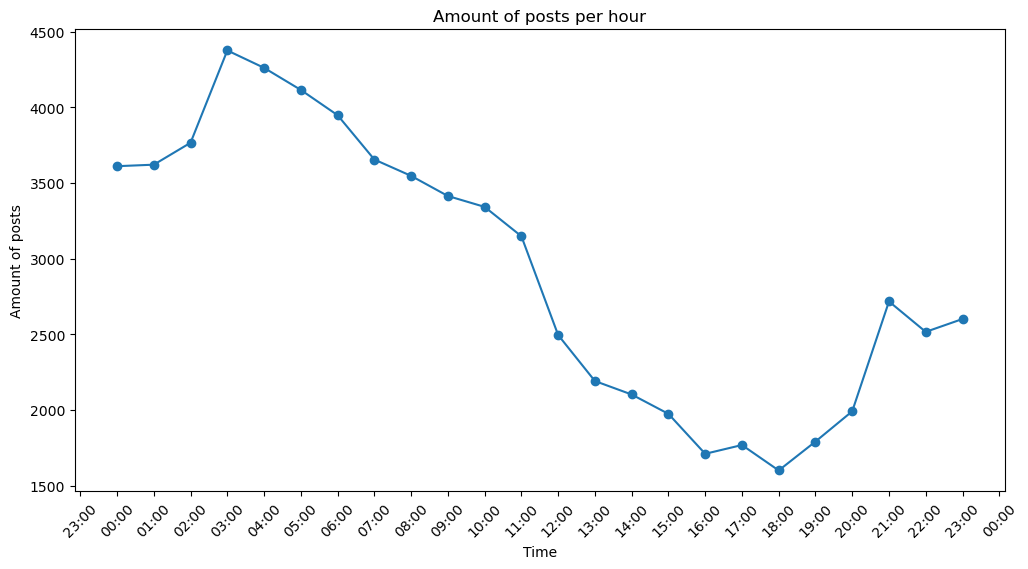

In [ ]:
# Plot the number of posts per hour
plt.figure(
    figsize=(12, 6)
)
plt.plot(
    posts_per_hour.index,
    posts_per_hour.values,
    marker="o",
    linestyle="-",
)

# Axis labels and title
plt.xlabel("Time")
plt.ylabel(
    "Amount of posts"
)
plt.title(
    "Amount of posts per hour"
)

# Format the x-axis
plt.xticks(
    rotation=45
)  # Rotate the x-axis labels for better readability
plt.gca().xaxis.set_major_locator(
    mdates.HourLocator(
        interval=1
    )
)  # Set the interval of the x-axis to 1 hour
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter(
        "%H:%M"
    )
)  # Set the format of the x-axis to hours and minutes
plt.grid(
    False
)  # Turn off the grid

# Save as PNG
plt.savefig(
    "posts_per_hour.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

# Show the plot
plt.show()

## 2.2. Duplicates

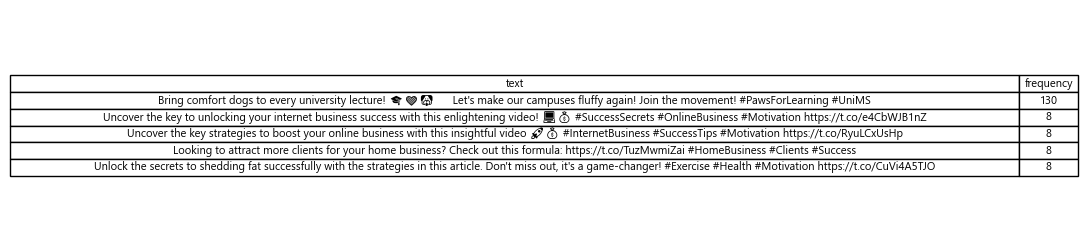

In [18]:
# Detect duplicates
duplicates = df_dataset[
    df_dataset.duplicated(
        subset=[
            "text"
        ],
        keep=False,
    )
]
text_counts = (
    duplicates[
        "text"
    ]
    .value_counts()
    .reset_index()
)
text_counts.columns = [
    "text",
    "frequency",
]

# Get top 5 duplicates
top_5 = text_counts.head()

# Plot the top 5 duplicates

plt.rcParams[
    "font.family"
] = "Segoe UI Emoji"  # Set the font family to 'Segoe UI Emoji' for emojis
fig, ax = (
    plt.subplots(
        figsize=(
            6,
            3,
        )
    )
)  # Create a figure and a set of subplots
ax.axis("tight")
ax.axis("off")

# Create table
table = ax.table(
    cellText=top_5.values,
    colLabels=top_5.columns,
    cellLoc="center",
    loc="center",
)

# Adjust column width
table.auto_set_column_width(
    [0, 1]
)  # Adjust text and frequency column width
table.auto_set_font_size(
    False
)
table.set_fontsize(
    8
)  # Adjust font size

# Save as PNG
plt.savefig(
    "duplicates_table.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

# 2.3 User

In [22]:
# Count the amount of posts per user
post_counts = (
    df_dataset[
        "user"
    ].value_counts()
)

# Get the top 25 users
top_users = post_counts.head(
    20
)
print(top_users)

user
robert78            838
acevedojacob        179
erika29             135
raymondberry        123
smithcynthia        120
annaschwartz        102
thomas39             91
reginabarnes         86
robert18             78
melissa92            76
jrocha               76
george56             71
kochshawn            65
oliviaramirez        65
pughmichelle         63
nsmith               60
mcculloughcarrie     57
brodriguez           53
michael29            53
abrown               52
Name: count, dtype: int64


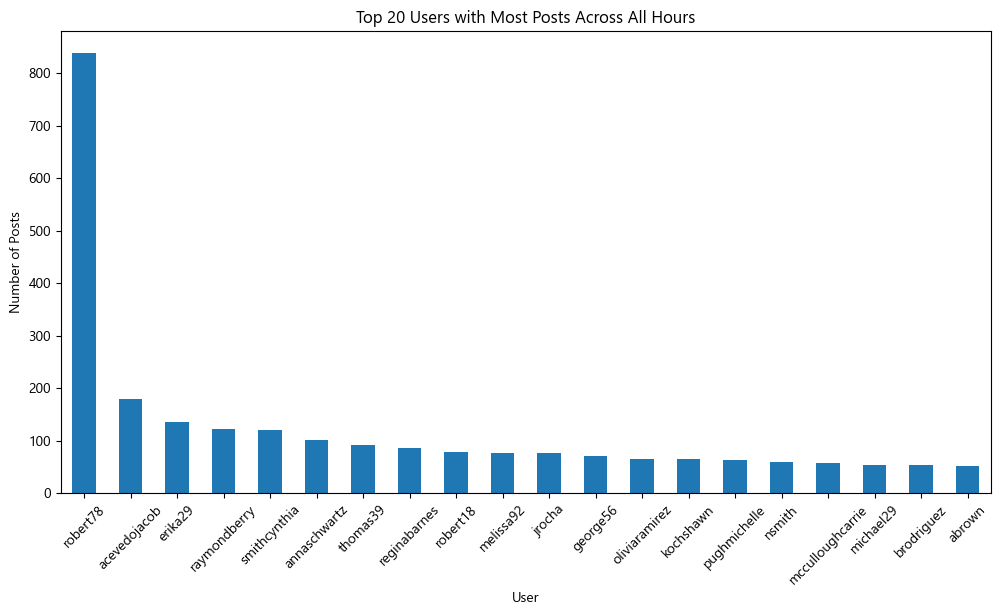

In [23]:
#   PLot the top 20 users
user_hourly_posts = (
    df_dataset.groupby(
        [
            "user",
            df_dataset[
                "timestamp"
            ].dt.hour,
        ]
    )
    .size()
    .unstack(
        fill_value=0
    )
)  # Count the number of posts per user per hour
top_users_hourly = (
    user_hourly_posts.sum(
        axis=1
    )
    .sort_values(
        ascending=False
    )
    .head(20)
)  # Sum the number of posts per user across all hours and get the top 20 users
top_users_hourly.plot(
    kind="bar",
    figsize=(12, 6),
)  # Plot the top 10 users with the most posts across all hours

# Axis labels and title
plt.title(
    "Top 20 Users with Most Posts Across All Hours"
)
plt.xlabel("User")
plt.ylabel(
    "Number of Posts"
)
plt.xticks(
    rotation=45
)

# Save as PNG
plt.savefig(
    "top 20 users with most posts",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

# Show the plot
plt.show()

In [24]:
# Cherry-pick some top users and check their posts
user_posts_acevedojacob = df_dataset[
    df_dataset[
        "user"
    ]
    == "acevedojacob"
]
user_posts_robert78 = df_dataset[
    df_dataset[
        "user"
    ]
    == "robert78"
]
user_posts_erika29 = df_dataset[
    df_dataset[
        "user"
    ]
    == "erika29"
]
user_posts_abrown = df_dataset[
    df_dataset[
        "user"
    ]
    == "abrown"
]

# Display the posts of the top users
display(
    user_posts_acevedojacob
)
display(
    user_posts_robert78
)
display(
    user_posts_erika29
)
display(
    user_posts_abrown
)

,timestamp,text,text_id,user,user_id
358,2024-10-31 00:04:58,@sharonchenhm @lakshmishaks @business Got two ...,2033153343,acevedojacob,1077881120
686,2024-10-31 00:10:44,@ImranKhanPTI @khrizwansaeed Test your knowled...,2016112818,acevedojacob,1077881120
1043,2024-10-31 00:16:30,@ScotNational @clickma How good is your knowle...,2048165924,acevedojacob,1077881120
1418,2024-10-31 00:22:17,@d_notices Have a look at this quiz to test yo...,2030127548,acevedojacob,1077881120
1752,2024-10-31 00:28:03,@DanielBleakley @real_jmcsomeone Can you get 1...,2046032240,acevedojacob,1077881120
...,...,...,...,...,...
68734,2024-10-31 23:23:22,@MattiaAganetti Have a look at this quiz to te...,2096553547,acevedojacob,1077881120
68959,2024-10-31 23:29:08,@mugilanmail Can you get 100% on this quiz abo...,2090040359,acevedojacob,1077881120
69218,2024-10-31 23:34:54,@fburdett47 Is your understanding of the clima...,2035242844,acevedojacob,1077881120
69445,2024-10-31 23:40:41,@koodeau Are you aware of the facts of the cli...,2046633248,acevedojacob,1077881120


,timestamp,text,text_id,user,user_id
92,2024-10-31 00:00:57,👀✈️🔊G-WYLD #GWYLD #Private #Cessna T210N Tu...,2015100373,robert78,1010626427
97,2024-10-31 00:01:00,👀✈️🔊N807AA #AAL203 #American Airlines #Boei...,2040796005,robert78,1010626427
180,2024-10-31 00:01:56,👀✈️🔊G-SAJL #LOG77A #Loganair #Embraer ERJ-1...,2022251130,robert78,1010626427
182,2024-10-31 00:01:57,👀✈️🔊G-PDGV #Unknown #PLM Dollar Group #Vulc...,2057647374,robert78,1010626427
239,2024-10-31 00:02:58,👀✈️🔊EI-DVL #EIN317 #Aer Lingus #Airbus A320...,2025276523,robert78,1010626427
...,...,...,...,...,...
69850,2024-10-31 23:50:16,👀✈️🔊N510DN #DAL73 #Delta Air Lines #Airbus ...,2093900489,robert78,1010626427
69899,2024-10-31 23:51:15,👀✈️🔊N29975 #UAL5 #United Airlines #Boeing 7...,2076988999,robert78,1010626427
69903,2024-10-31 23:51:17,👀✈️🔊G-JZBJ #EXS81FR #Jet2 #Boeing 737NG 800...,2050656573,robert78,1010626427
69943,2024-10-31 23:52:16,👀✈️🔊G-RBRI #GRBRI #Helicentre Aviation Ltd ...,2037913463,robert78,1010626427


,timestamp,text,text_id,user,user_id
20190,2024-10-31 05:06:54,.@RepBillFoster Take climate action and suppor...,2003916965,erika29,1007690223
20202,2024-10-31 05:07:01,.@SenatorDurbin Take climate action and suppor...,2041685748,erika29,1007690223
20214,2024-10-31 05:07:08,.@SenDuckworth Take climate action and support...,2027912851,erika29,1007690223
20233,2024-10-31 05:07:28,.@RepBillFoster. I am a voter in Aurora. I sup...,2073279449,erika29,1007690223
20248,2024-10-31 05:07:37,.@SenatorDurbin. I am a voter in Aurora. I sup...,2017759354,erika29,1007690223
...,...,...,...,...,...
24748,2024-10-31 06:14:01,.@DUALIPA I'm a fan who cares deeply about the...,2033097956,erika29,1007690223
24769,2024-10-31 06:14:22,.@RepBillFoster I'm a voter in Aurora. Nearly ...,2046429684,erika29,1007690223
24782,2024-10-31 06:14:33,.@SenatorDurbin I'm a voter in Aurora. Nearly ...,2002906129,erika29,1007690223
24804,2024-10-31 06:15:00,".@JBPritzker I'm a voter in Aurora. Nearly 11,...",2004954060,erika29,1007690223


,timestamp,text,text_id,user,user_id
173,2024-10-31 00:01:50,Are you an aspiring entrepreneur? Learn the es...,2093456943,abrown,1039882441
488,2024-10-31 00:07:02,"🚀 Entrepreneurs, wondering what it takes to su...",2007960233,abrown,1039882441
956,2024-10-31 00:15:07,Maximize your local business visibility with t...,2072216270,abrown,1091258438
1021,2024-10-31 00:16:06,Considering hiring a freelancer for your agenc...,2068371604,abrown,1039882441
3156,2024-10-31 00:52:55,Running a business online? Make sure you're re...,2076377301,abrown,1039882441
3157,2024-10-31 00:52:55,Attention business owners! Don't limit your gr...,2034591967,abrown,1039882441
3320,2024-10-31 00:55:42,Attention business entrepreneurs! Ready to cre...,2081533769,abrown,1039882441
3754,2024-10-31 01:01:32,Discover the top 10 workflow management softwa...,2042738290,abrown,1091258438
4396,2024-10-31 01:12:07,Mastering Business Budgeting: Essential tips f...,2010174403,abrown,1091258438
4491,2024-10-31 01:13:36,Expanding your business abroad comes with its ...,2058615246,abrown,1091258438


### Interpretation
Cherry picked users are probabaly spammers or maybe bots which use the platform for promoting own campaigns. One common way by linking other users to it to gain more attention for their spamming campaign. 

# Network Analysis


## Merge dataset and graph data set


In [25]:
# First look at the Network Data Frame
display(df_graph)

,source,target,weight
0,1084949174,1050463558,1
1,1084949174,1002148361,1
2,1084949174,1000741574,1
3,1084949174,1019020642,1
4,1084949174,1044910984,1
...,...,...,...
94879,1051021947,1003736990,1
94880,1049442903,1010058843,1
94881,1094656395,1024023012,1
94882,1040286105,1071783991,1


In [26]:
# Summary statistics for the Network Data Frame
unique_users_network = pd.concat(
    [
        df_graph[
            "source"
        ],
        df_graph[
            "target"
        ],
    ]
).unique()

# Count the number of (unique) users
num_unique_users = len(
    unique_users_network
)
print(
    f"Number of unique users: {num_unique_users}"
)

Number of unique users: 46849


In [ ]:
# Count the number of connections
user_connections = pd.concat(
    [
        df_graph[
            "source"
        ],
        df_graph[
            "target"
        ],
    ]
).value_counts()

# Convert the series to a data frame
df_user_connections = user_connections.reset_index()
df_user_connections.columns = [
    "user_id",
    "connections",
]

# Calculate the average number of connections per user
average_connections = df_user_connections[
    "connections"
].mean()
print(
    f"The average number of connections per users is: {average_connections:.2f}"
)

# Die Top 20 User mit den meisten Verbindungen anzeigen
display(
    df_user_connections.head(
        20
    )
)

The average number of connections per users is: 4.05


,user_id,connections
0,1010626427,1787
1,1027710225,53
2,1018042330,49
3,1030048137,49
4,1084949174,46
5,1066276793,46
6,1090990902,46
7,1059101695,46
8,1047703640,45
9,1094406700,43


In [32]:
# Show the latest postings of the top 20 users with the most connections
top_20_users = df_user_connections[
    "user_id"
].head(20)
df_top_users_posts = df_dataset[
    df_dataset[
        "user_id"
    ].isin(
        top_20_users
    )
]

# Sort by timestamp and drop duplicates
df_top_users_posts = df_top_users_posts.sort_values(
    by="timestamp",
    ascending=False,
).drop_duplicates(
    subset=[
        "user_id"
    ],
    keep="first",
)

# Merge with df_user_connections to add the number of connections
df_top_users_posts = df_top_users_posts.merge(
    df_user_connections,
    on="user_id",
    how="left",
)

# Display the latest posts of the top 20 users with the most connections
display(
    df_top_users_posts
)

,timestamp,text,text_id,user,user_id,connections
0,2024-10-31 23:52:17,👀✈️🔊PH-AKA #Unknown #KLM Royal Dutch Airline...,2081134183,robert78,1010626427,1787
1,2024-10-31 23:44:13,Have you checked out the latest political high...,2030309078,mercedes32,1030292229,41
2,2024-10-31 21:16:11,Streaming Caelid adventures in Elden Ring! 💥 J...,2020031420,brandonsmith,1096156006,42
3,2024-10-31 20:53:59,@goodmankenneth Time to take your skills to th...,2042309582,mlewis,1094406700,43
4,2024-10-31 20:10:12,Stalled vehicle blocking right shoulder on I-2...,2077687874,tclark,1013723210,43
5,2024-10-31 18:59:40,"@daykristin Guys, @martinmisty @bakerkatherine...",2077644574,owood,1066276793,46
6,2024-10-31 18:52:29,@laura62: *3 มิ.ย #XIA Seoul Dream Show *15 มิ...,2029943574,edward47,1041308936,42
7,2024-10-31 18:52:28,@ljohnson: A heartfelt shoutout to @katherine3...,2021827121,eugenefields,1047251327,41
8,2024-10-31 13:37:39,Are you ready to be transformed by the science...,2041378676,jenniferbenton,1059101695,46
9,2024-10-31 12:34:21,Seeking a Business Program Manager at Aquent f...,2030416112,ian18,1023612161,42
